In [1]:
import numpy as np
import pandas as pd

In [2]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [3]:
import cufflinks as cf
cf.go_offline()

In [4]:
#Ceny akcji KGHM
dataset_1 = pd.read_csv('kgh_d.csv')
dataset_1.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2015-01-02,102.45,102.83,101.97,102.40,309987
1,2015-01-05,102.16,102.88,99.91,100.09,479228
2,2015-01-07,100.53,105.45,99.67,104.89,966372
3,2015-01-08,105.35,107.15,105.35,107.11,711805
4,2015-01-09,107.15,107.15,103.87,104.33,563221


In [5]:
#Ceny miedzi
dataset_2 = pd.read_csv('ca_c_f_d.csv')
dataset_2.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie
0,2015-01-02,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,6216.0,6216.0,6216.0,6216.0
2,2015-01-06,6191.0,6191.0,6191.0,6191.0
3,2015-01-07,6170.0,6170.0,6170.0,6170.0
4,2015-01-08,6230.5,6230.5,6230.5,6230.5


In [6]:
dataset_1['Data']=pd.to_datetime(dataset_1['Data']).dt.strftime('%Y-%m-%d')
dataset_2['Data']=pd.to_datetime(dataset_2['Data']).dt.strftime('%Y-%m-%d')

In [7]:
import plotly.offline as pyo
import plotly.graph_objs as go

In [12]:
from plotly import subplots

In [13]:
fig = subplots.make_subplots(rows=3,cols=1,subplot_titles=['KGHM','Miedź'],shared_xaxes=True,
                             specs=[[{"type": "xy"}], [{"type": "xy"}], [{"type": "table"}]])

In [14]:
#Trzeba uwzględnić tylko daty, dla których mamy informacje zarówno o KGHM, jak i o miedzi
merged_dataset=pd.merge(dataset_1, dataset_2, on='Data', suffixes=('_KGHM', '_Miedź'))
merged_dataset.head()

,Data,Otwarcie_KGHM,Najwyzszy_KGHM,Najnizszy_KGHM,Zamkniecie_KGHM,Wolumen,Otwarcie_Miedź,Najwyzszy_Miedź,Najnizszy_Miedź,Zamkniecie_Miedź
0,2015-01-02,102.45,102.83,101.97,102.40,309987,6309.0,6309.0,6309.0,6309.0
1,2015-01-05,102.16,102.88,99.91,100.09,479228,6216.0,6216.0,6216.0,6216.0
2,2015-01-07,100.53,105.45,99.67,104.89,966372,6170.0,6170.0,6170.0,6170.0
3,2015-01-08,105.35,107.15,105.35,107.11,711805,6230.5,6230.5,6230.5,6230.5
4,2015-01-09,107.15,107.15,103.87,104.33,563221,6151.0,6151.0,6151.0,6151.0


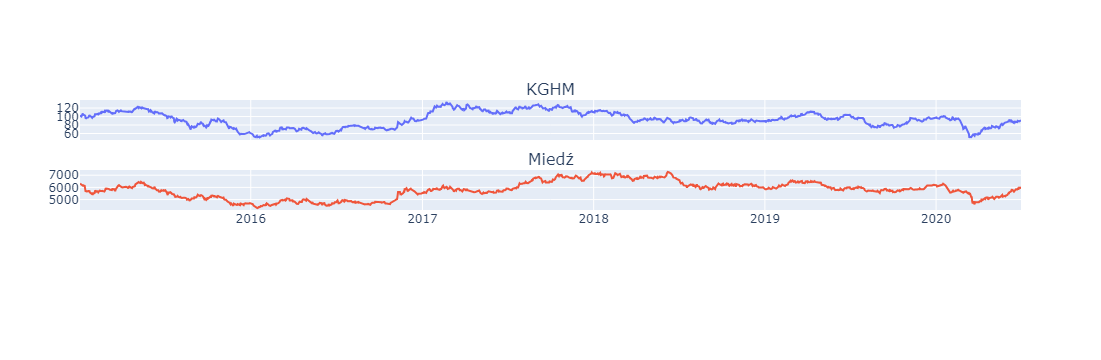

In [15]:
fig.add_trace(go.Scatter(x=merged_dataset['Data'],y=merged_dataset['Zamkniecie_KGHM'],name='KGHM',showlegend=False),1,1)

fig.add_trace(go.Scatter(x=merged_dataset['Data'],y=merged_dataset['Zamkniecie_Miedź'],name='Miedź',showlegend=False),2,1)

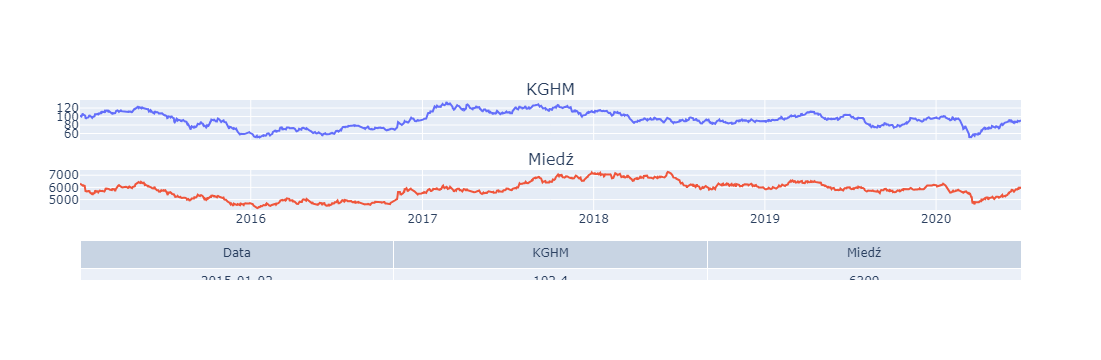

In [17]:
fig.add_trace(go.Table(header=dict(values=['Data', 'KGHM', 'Miedź']),
                       cells=dict(values=[merged_dataset['Data'], merged_dataset['Zamkniecie_KGHM'], merged_dataset['Zamkniecie_Miedź']])),3,1)

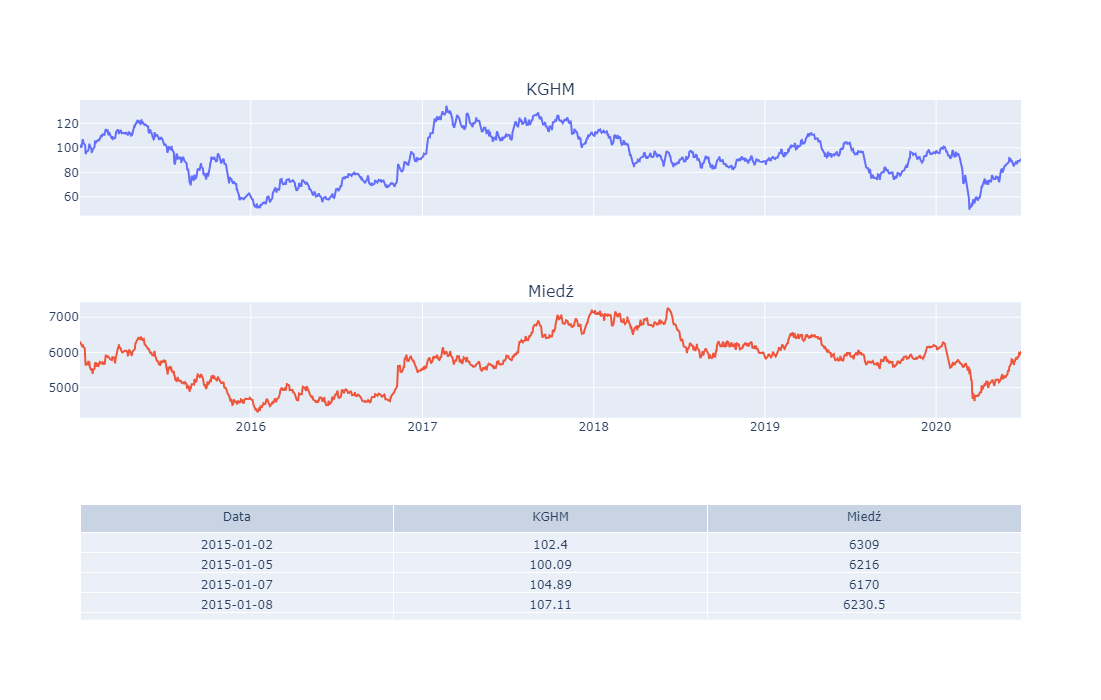

In [18]:
fig.update_layout(height=700,width=1000)
fig.show()

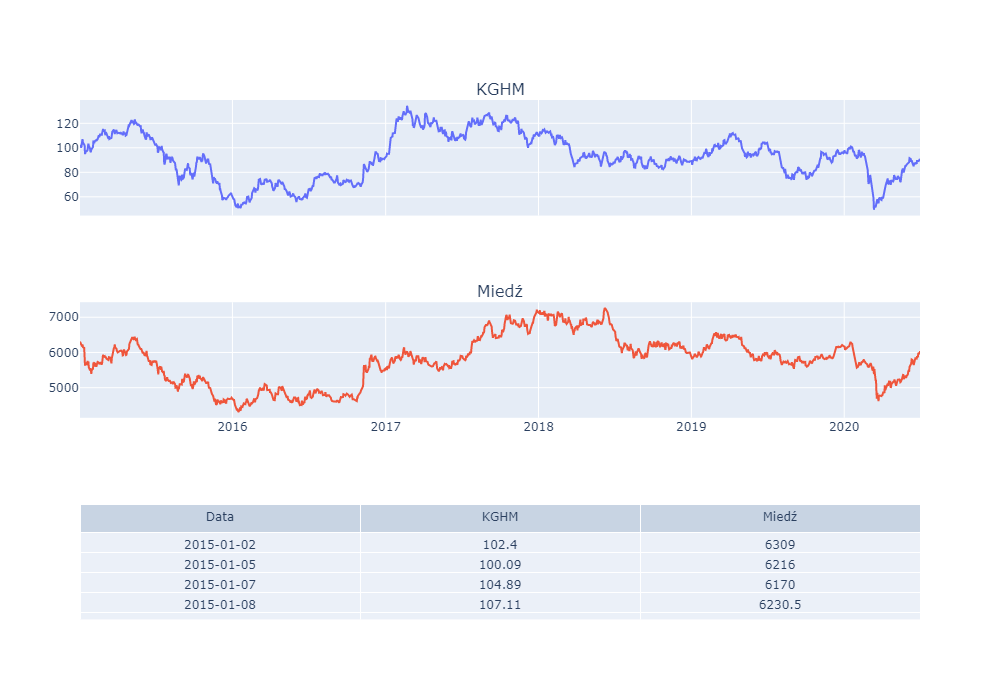

In [19]:
import plotly.io as pio
pio.show(fig, renderer='png')